In [1]:
import numpy as np
import time
from matplotlib import pylab as plt

from scipy.io import savemat, loadmat

# Figure 2

# Note that this data has been extracted from the plot in the lab

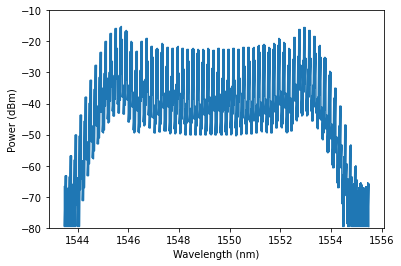

In [2]:
raw_data = np.loadtxt("data/2_OSA_Spectrum_Comb.csv", delimiter=",")
x, y = raw_data[:, 0], raw_data[:, 1]

plt.figure()
plt.plot(x, y)
plt.ylim([-80, -10])
plt.xlabel('Wavelength (nm)')
plt.ylabel('Power (dBm)')
plt.savefig("plots/fig2-comb.pdf", bbox_inches="tight")

# Figure 3

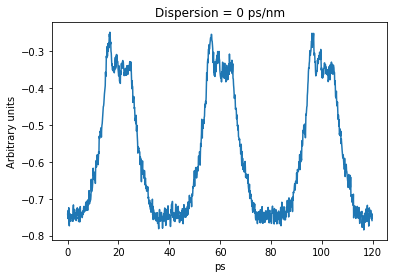

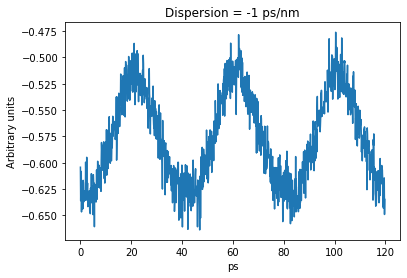

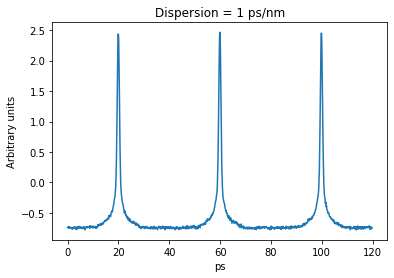

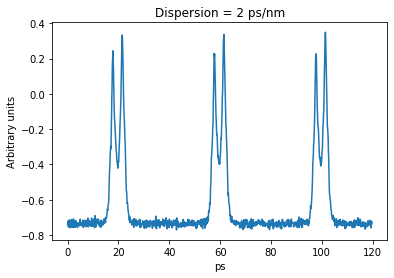

In [3]:
dispersions = ["0", "-1", "1", "2"]

for disp in dispersions:
    raw_data = loadmat("data/3_displacement_{}.mat".format(disp))
    x = raw_data['time_averaged_ChB'].ravel()
    y = raw_data['power_averaged_ChB'].ravel()
    plt.plot(x, y)
    plt.xlabel('ps')
    plt.ylabel('Arbitrary units')
    plt.title("Dispersion = {} ps/nm".format(disp))
    plt.savefig("plots/fig3-dispersion_{}.pdf".format(disp), bbox_inches="tight")
    plt.show()

# Figure 4

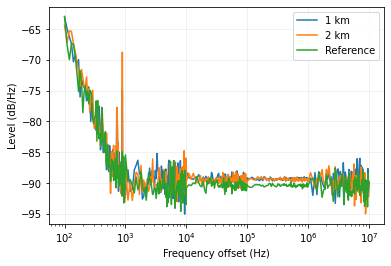

In [4]:
for label in ["1", "2"]:
    raw_data = np.loadtxt("data/4_phasenoise_{}km.csv".format(label), delimiter=",", skiprows=22)
    x, y = raw_data[:, 0], raw_data[:, 1]
    plt.semilogx(x, y, label="{} km".format(label))

    
label = "ref"
raw_data = np.loadtxt("data/4_phasenoise_{}km.csv".format(label), delimiter=",", skiprows=22)
x, y = raw_data[:, 0], raw_data[:, 1]
plt.semilogx(x, y, label="Reference")

plt.legend()
plt.xlabel('Frequency offset (Hz)')
plt.ylabel('Level (dB/Hz)')
plt.grid(alpha=0.2)

plt.savefig("plots/fig4-noise-spectrum.pdf".format(disp), bbox_inches="tight")

# Figure 5

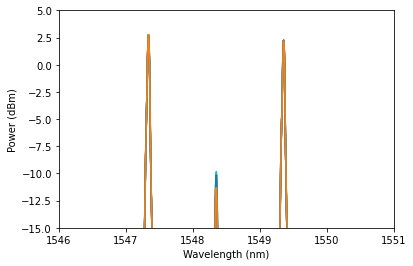

In [5]:
for phase in [0.0, 0.05, 0.1, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.5, 3.0]:    
    mat = loadmat('data/phase-sensitive-amp-phase-{}.mat'.format(str(phase)))
    wl = mat["wl"].ravel()
    power = mat["power"].ravel()
    plt.plot(wl,power)

plt.xlim(1546, 1551)
plt.ylim(-15, 5)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Power (dBm)')
plt.savefig("plots/fig5-phase-sensitive-amplification.pdf".format(disp), bbox_inches="tight")
plt.show()

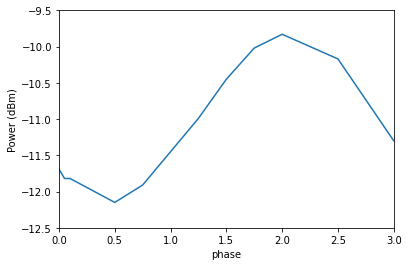

In [6]:
max_power = []
phases = [0.0, 0.05, 0.1, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.5, 3.0]

for phase in phases:
    mat = loadmat('data/phase-sensitive-amp-phase-{}.mat'.format(str(phase)))
    wl = mat["wl"].ravel()
    power = mat["power"].ravel()
    max_power.append(max(power[1500:2500]))
    

plt.plot(phases, max_power)
plt.xlim(0,3)
plt.ylim(-12.5, -9.5)
plt.xlabel('phase')
plt.ylabel('Power (dBm)')
plt.savefig("plots/fig6-amplification-peak.pdf".format(disp), bbox_inches="tight")
plt.show()